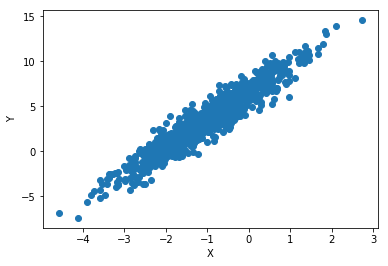

The covariance matrix calculated by hand is:
[[ 1.0488663   3.14059323]
 [ 3.14059323 10.43188249]]
The covariance matrix calculated using np.cov() is:
[[ 1.04991622  3.14373697]
 [ 3.14373697 10.44232481]]
The correlation coefficient is 0.9494460267240373
The variables are correlated
The normalized covariance matrix for the two dimensional data is:
[[1.         0.94944603]
 [0.94944603 1.        ]]
The eigenvalues of the normalized covariance matrix are: [1.94944603 0.05055397]
The normalized eigenvectors of the normalized covariance matrix are: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
The principle components are:
[5.05539733e-02 5.39320296e-18]
the variances of each principle components (in increasing order) are the eigenvalue of the covariance matrix:
[0.05055397 1.94944603]
Now it will be done the same procedure using a DataFrame containing five columns


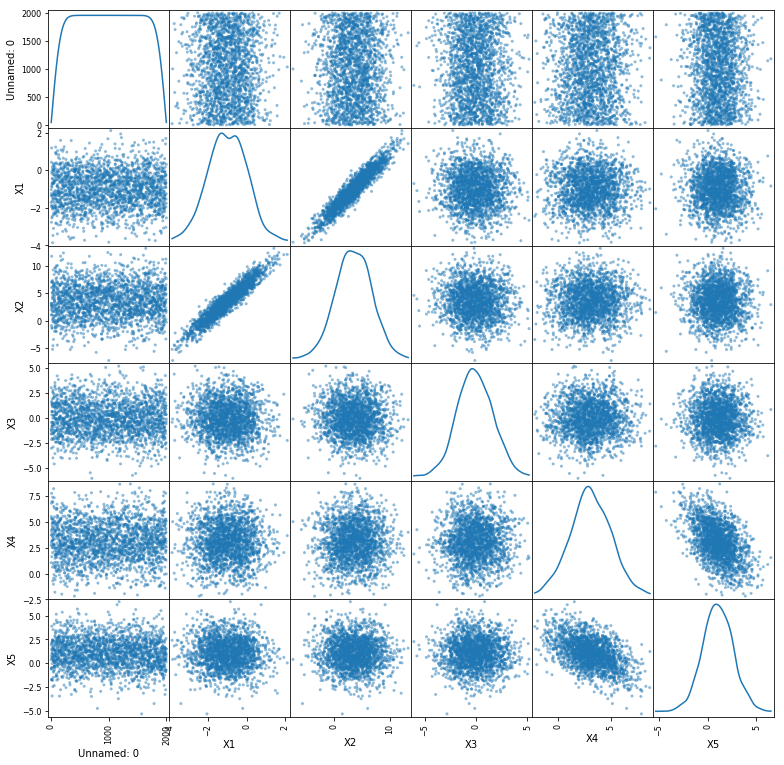

The covariance matrix calculated by hand for the five dimensional data is:
[[ 0.95237517  2.87950804 -0.06653584  0.01807121 -0.04845528]
 [ 2.87950804  9.70270498 -0.24349474  0.0872467  -0.12357462]
 [-0.06653584 -0.24349474  2.89509342  0.07193771 -0.02947856]
 [ 0.01807121  0.0872467   0.07193771  3.45439789 -1.42267572]
 [-0.04845528 -0.12357462 -0.02947856 -1.42267572  2.4411335 ]]
The normalized covariance matrix for the five dimensional data is:
[[ 1.          0.94725706 -0.04007009  0.00996316 -0.03177908]
 [ 0.94725706  1.         -0.04594221  0.01507011 -0.02539143]
 [-0.04007009 -0.04594221  1.          0.02274779 -0.01108866]
 [ 0.00996316  0.01507011  0.02274779  1.         -0.48991865]
 [-0.03177908 -0.02539143 -0.01108866 -0.48991865  1.        ]]
The eigenvalues of the normalized covariance matrix of the five dimensional data are:
[1.95469642 0.05265141 1.48798301 0.99481092 0.50985824]
The normalized eigenvectors of the normalized covariance matrix of the five dimensi

In [1]:
# homework # 01

## Here we are going to get a little experience with the covariance matrix 
## of data and principle components analysis (PCA).  This was introduced in the 
## lectures.


import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline


# 1) Read file homework_01_2d-datafile.csv into a dataframe using pandas


two_dim=pd.read_csv('homework_01_2d-datafile.csv')
   
    
# make a scatter plot of them


plt.scatter(two_dim['X'],two_dim['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# 2) Find the covariance matrix for the two variables.  There is a python function 
#    for this, but it would be more instructive if you write your own.

index=[0,1]
cov_2d=np.zeros((2,2))
mat_2d=np.array([[two_dim['X']], [two_dim['Y']]])
for i in index:
    for j in index:
        cov_2d[i][j]=np.sum((mat_2d[i]-np.mean(mat_2d[i]))*(mat_2d[j]-np.mean(mat_2d[j])))/len(mat_2d[i].T)
print('The covariance matrix calculated by hand is:')
print(cov_2d)
print('The covariance matrix calculated using np.cov() is:')
print(np.cov(two_dim['X'],two_dim['Y'])) 

    
    # Are they correlated? (Remember to normalize the correlation coefficient.)

    
cov_coef_2d=cov_2d[0][1]/(np.std(mat_2d[0])*np.std(mat_2d[1]))
print('The correlation coefficient is '+ str(cov_coef_2d))
if cov_coef_2d == 0:
    print('The variables are not correlated')
elif cov_coef_2d <0:
    print('The variables are anticorrelated')
elif cov_coef_2d >0:
    print('The variables are correlated')


norm_cov_2d=np.zeros((2,2))
for i in index:
    for j in index:
        norm_cov_2d[i][j]=cov_2d[i][j]/(np.std(mat_2d[i])*np.std(mat_2d[j]))
print('The normalized covariance matrix for the two dimensional data is:')
print(norm_cov_2d)

# 3) Decompose the covariance matrix using an eigenvalue decompositions (There are 
#    python functions for this.)


w_2d,v_2d=np.linalg.eig(norm_cov_2d)
print('The eigenvalues of the normalized covariance matrix are: ' +str(w_2d))
print('The normalized eigenvectors of the normalized covariance matrix are: ' +str(v_2d))

    #Use the next lines if you want to get back your covariance matrix from the eigendecomposition:
    #eigen_cov_2d=np.dot(v_2d,np.dot(np.diag(w_2d), np.linalg.inv(v_2d)))
    #print('The eigendecomposition of the covariance matrix is:')
    #print(eigen_cov_2d)  
    
# What are the principle components of the data? Normalize the vectors to one.
    #I'm very sorry but I didn't know how to calculate the principle components, so I searched on the internet for some help, and what I found useful is this webside:http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    #I hope not to have committed big mistakes...
pca_2d=PCA(n_components=2)
pca_2d.fit(norm_cov_2d)
print('The principle components are:')
print(pca_2d.singular_values_)

# What are the variances of each principle component?
w_2d.sort()
print('the variances of each principle components (in increasing order) are the eigenvalue of the covariance matrix:')
print(w_2d)








#4) Do 1 through 3, but using the data file homework_01_5d-datafile.csv this time.
#    In this case the data is 5 dimensional.

print('Now it will be done the same procedure using a DataFrame containing five columns')


five_dim=pd.read_csv('homework_01_5d-datafile.csv')

scatter_matrix(five_dim,figsize=(13,13),diagonal='kde',alpha=0.5)
plt.show()


index=[0,1,2,3,4]
cov_5d=np.zeros((5,5))
mat_5d=np.array([[five_dim['X1']], [five_dim['X2']],[five_dim['X3']],[five_dim['X4']],[five_dim['X5']]],)
for i in index:
    for j in index:
        cov_5d[i][j]=np.sum((mat_5d[i]-np.mean(mat_5d[i]))*(mat_5d[j]-np.mean(mat_5d[j])))/len(mat_5d[i].T)
print('The covariance matrix calculated by hand for the five dimensional data is:')
print(cov_5d)


norm_cov_5d=np.zeros((5,5))
for i in index:
    for j in index:
        norm_cov_5d[i][j]=cov_5d[i][j]/(np.std(mat_5d[i])*np.std(mat_5d[j]))
print('The normalized covariance matrix for the five dimensional data is:')
print(norm_cov_5d)


w_5d,v_5d=np.linalg.eig(norm_cov_5d)
print('The eigenvalues of the normalized covariance matrix of the five dimensional data are:')
print(w_5d)
print('The normalized eigenvectors of the normalized covariance matrix of the five dimensional data are:')
print(v_5d)


pca_5d=PCA(n_components=5)
pca_5d.fit(norm_cov_5d)
print('The principle components are:')
print(pca_5d.singular_values_)


w_5d.sort()
print('the variances of each principle components (in increasing order) are the eigenvalue of the covariance matrix:')
print(w_5d)


    # Which variables seem to be correlated with each other and which ones not?
print('The variables which have a correlation coefficient significantly different from zero are correlated, in our example  it seems that X1 is correlated to X2 and X4 is correlated with X5, even if X4 and X5 are only SLIGHTLY anticorrelated')
